In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

%matplotlib inline

In [11]:
filepath = '../data/Jeeps.v1.xlsx'
jeep = pd.read_excel(filepath)

In [12]:
jeep.shape

(40373, 8)

In [40]:
jeep.dtypes

Price       int64
Year        int64
Mileage     int64
City       object
State      object
Vin        object
Make       object
Model      object
dtype: object

In [13]:
jeep.head()

,Price,Year,Mileage,City,State,Vin,Make,Model
0,4788,2000,136872,Oklahoma City,OK,1J4FF47S4YL206160,Jeep,Cherokee
1,7995,1999,102437,West Palm Beach,FL,1J4FT27S8XL551431,Jeep,Cherokee
2,3999,1998,188522,Longmont,CO,1J4FT27P0WL262389,Jeep,Cherokee
3,4555,2000,129610,Fairborn,OH,1J4FF48S3YL149514,Jeep,Cherokee
4,4200,2000,122009,Garfield,NJ,1J4FF48S5YL154598,Jeep,Cherokee


In [50]:
jeep.describe()

,Price,Year,Mileage
count,40373.000000,40373.000000,40373.000000
mean,22561.040968,2013.643896,48358.991207
std,9127.272734,3.204347,36450.504146
min,1500.000000,1997.000000,5.000000
25%,15988.000000,2012.000000,23519.000000
50%,21599.000000,2015.000000,38299.000000
75%,28995.000000,2016.000000,64446.000000
max,229977.000000,2018.000000,527411.000000


I need to create columns for each model so that I can use the models as a feature

In [14]:
jeep_models = pd.get_dummies(jeep, columns=['Model'])

In [15]:
jeep_models.head()

,Price,Year,Mileage,City,State,Vin,Make,Model_Cherokee,Model_Commander,Model_Compass,Model_Grand,Model_Liberty,Model_Patriot,Model_Renegade,Model_Wrangler
0,4788,2000,136872,Oklahoma City,OK,1J4FF47S4YL206160,Jeep,1,0,0,0,0,0,0,0
1,7995,1999,102437,West Palm Beach,FL,1J4FT27S8XL551431,Jeep,1,0,0,0,0,0,0,0
2,3999,1998,188522,Longmont,CO,1J4FT27P0WL262389,Jeep,1,0,0,0,0,0,0,0
3,4555,2000,129610,Fairborn,OH,1J4FF48S3YL149514,Jeep,1,0,0,0,0,0,0,0
4,4200,2000,122009,Garfield,NJ,1J4FF48S5YL154598,Jeep,1,0,0,0,0,0,0,0


In [16]:
jeep_models.columns

Index(['Price', 'Year', 'Mileage', 'City', 'State', 'Vin', 'Make',
       'Model_Cherokee', 'Model_Commander', 'Model_Compass', 'Model_Grand',
       'Model_Liberty', 'Model_Patriot', 'Model_Renegade', 'Model_Wrangler'],
      dtype='object')

Price will be my target variable with Year, Mileage and the Models colums as features

In [19]:
y = jeep_models.loc[:,'Price']
X = jeep_models.drop(['Price','City','State','Vin','Make'], axis='columns')

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=16)

lr = LinearRegression()

lr.fit(X_train, y_train)

print('Test R-Squared:', lr.score(X_test, y_test))       
print('Training R-Squared:', lr.score(X_train, y_train))

Test Data R-Squared: 0.7578684098365145
Training Data R-Squared: 0.7614526694577064


In [27]:
y_pred = lr.predict(X)

print('Test MSE:', mean_squared_error(y_test, lr.predict(X_test)))
print('Training MSE:', mean_squared_error(y_train, lr.predict(X_train)))

print('Test RSME:', np.sqrt(mean_squared_error(y_test, lr.predict(X_test))))
print('Training RSME:', np.sqrt(mean_squared_error(y_train, lr.predict(X_train))))

Test MSE: 20801159.210652933
Training MSE: 19663996.36976929
Test RSME: 4560.828785500826
Training RSME: 4434.4104872879425


In [28]:
list(zip(lr.predict(X_test), y_test))

[(11165.660653206054, 10981),
 (19694.455196272116, 18577),
 (17462.884682891425, 13885),
 (23437.74829433579, 18772),
 (20195.119547770824, 18991),
 (18841.47649040958, 15498),
 (31441.148092482705, 23488),
 (20734.32282919949, 17950),
 (22704.4072367372, 22296),
 (26664.209189292975, 29100),
 (21640.76572568249, 22194),
 (25079.99936960358, 23500),
 (21704.018167930655, 14950),
 (21014.007550901733, 18291),
 (14752.425151180476, 15000),
 (20692.322016138583, 24992),
 (13961.951292925514, 13988),
 (23470.48374429252, 19282),
 (-1327.9977107229643, 4294),
 (26449.682511277497, 27900),
 (23286.054379933048, 21487),
 (18997.710022761952, 16882),
 (13467.440488718916, 11987),
 (32384.40013750596, 30495),
 (16246.48323614709, 14499),
 (15656.01038956875, 12995),
 (18616.81298257783, 17999),
 (18083.88988553267, 18597),
 (18575.596290824004, 16999),
 (22322.231725351885, 19950),
 (27441.232560869306, 24998),
 (24994.055113699287, 29990),
 (27483.45356607018, 29995),
 (33608.91270474577, 679

In [30]:
print('Intercept:', lr.intercept_)
list(zip(X.columns, lr.coef_))

Intercept: -2232546.1690879026


[('Year', 1120.3370500757785),
 ('Mileage', -0.0790655528099894),
 ('Model_Cherokee', -1697.2268635493967),
 ('Model_Commander', 3119.6580370914717),
 ('Model_Compass', -6432.006572577984),
 ('Model_Grand', 6537.167287375187),
 ('Model_Liberty', -232.06761642448834),
 ('Model_Patriot', -6919.874726987172),
 ('Model_Renegade', -4460.872729607255),
 ('Model_Wrangler', 10085.22318467964)]

The model appears to be underfitting

In [31]:
jeep_models.corr()

,Price,Year,Mileage,Model_Cherokee,Model_Commander,Model_Compass,Model_Grand,Model_Liberty,Model_Patriot,Model_Renegade,Model_Wrangler
Price,1.000000,0.468449,-0.525458,-0.080576,-0.132975,-0.263191,0.177429,-0.267341,-0.304441,-0.068749,0.434190
Year,0.468449,1.000000,-0.805734,0.188393,-0.187466,0.103867,-0.068076,-0.288443,0.120097,0.177682,-0.149673
Mileage,-0.525458,-0.805734,1.000000,-0.162004,0.191850,-0.045877,0.112802,0.264929,-0.070933,-0.181364,0.027580
Model_Cherokee,-0.080576,0.188393,-0.162004,1.000000,-0.038166,-0.124528,-0.243262,-0.080674,-0.138474,-0.096360,-0.258205
Model_Commander,-0.132975,-0.187466,0.191850,-0.038166,1.000000,-0.029685,-0.057988,-0.019231,-0.033009,-0.022970,-0.061550
Model_Compass,-0.263191,0.103867,-0.045877,-0.124528,-0.029685,1.000000,-0.189201,-0.062745,-0.107700,-0.074945,-0.200823
Model_Grand,0.177429,-0.068076,0.112802,-0.243262,-0.057988,-0.189201,1.000000,-0.122571,-0.210389,-0.146403,-0.392300
Model_Liberty,-0.267341,-0.288443,0.264929,-0.080674,-0.019231,-0.062745,-0.122571,1.000000,-0.069772,-0.048552,-0.130100
Model_Patriot,-0.304441,0.120097,-0.070933,-0.138474,-0.033009,-0.107700,-0.210389,-0.069772,1.000000,-0.083338,-0.223312
Model_Renegade,-0.068749,0.177682,-0.181364,-0.096360,-0.022970,-0.074945,-0.146403,-0.048552,-0.083338,1.000000,-0.155396


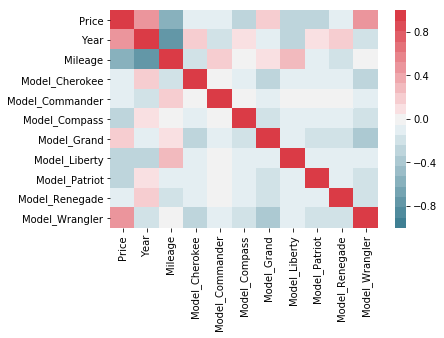

In [32]:
ax=sns.heatmap(jeep_models.corr(),
            vmin=-1,
            vmax=1,
            cmap=sns.diverging_palette(220, 10, n=21)
           )

In [37]:
y_test - lr.predict(X_test)

5934     -184.660653
13588   -1117.455196
37651   -3577.884683
12079   -4665.748294
23329   -1204.119548
4560    -3343.476490
39577   -7953.148092
37687   -2784.322829
27021    -408.407237
32462    2435.790811
35558     553.234274
2424    -1579.999370
37195   -6754.018168
26550   -2723.007551
7281      247.574849
4175     4299.677984
25777      26.048707
1003    -4188.483744
21537    5621.997711
34905    1450.317489
30219   -1799.054380
1951    -2115.710023
12045   -1480.440489
29546   -1889.400138
8287    -1747.483236
11776   -2661.010390
26240    -617.812983
14031     513.110114
8592    -1576.596291
29014   -2372.231725
            ...     
6418     2068.327423
36881    3193.648107
442       123.496194
23346   -1597.332856
14539     164.574445
19764     623.101011
40256   -2936.901967
27964     285.544644
1257    -1453.087756
39818   -6686.305498
15595    1505.743957
31226   -1019.352640
4073     3175.107698
14314    -619.624839
37954   -1712.513550
5635      371.585188
8626     -828

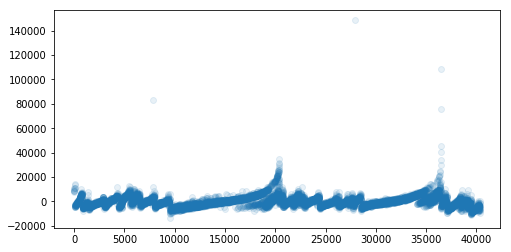

In [38]:
fig, ax = plt.subplots(figsize=(8,4))
residuals = y_test - lr.predict(X_test)
ax.scatter(x=y_test.index, y=residuals, alpha=.1);